# **Analisis Finance E-Commerce Dataset**

Sumber Dataset: https://www.kaggle.com/datasets/ranilnr/finance-ecommerce-dirty-dataset-csv

# **Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.impute import KNNImputer

# Memuat Dataset

In [ ]:
file = "/content/drive/MyDrive/Tugas-Tugas Praktikum/Tugas AVD/CheckPoint 2:  Data Understanding/Finance_Ecommerce_Dirty_Dataset_csv.csv"

df = pd.read_csv(file)
df

,TransactionID,Date,AccountID,AccountName,TransactionType,Amount,Currency,ExchangeRate,Balance,Merchant,...,Subcategory,Country,City,PostalCode,CardNumber,Email,Phone,IsFraud,Notes,CustomerSince
0,TX103251,4/3/2025,AC3973,Arjun Sharma,Debit,47.36,USD,80.6864,-1714968.59,ShopEasy,...,Books,UK,Pune,153621.0,XXXX-XXXX-XXXX-4249,arjun.sharma@hotmail.com,-4.469492e+09,No,repeat purchase,16/09/2018
1,TX101874,10/8/2024,AC8970,Dev Kumar,Debit,159.55,inr,1.0000,-1162428.75,AutoZone,...,Concert,Australia,Delhi,380312.0,XXXX-XXXX-5979,dev.kumar@yahoo.com,5.882006e+09,No,cashback credited,11/7/2022
2,TX103746,9/14/2024,AC3777,Amit Gupta,Debit,2.43,GBP,102.0148,-2085783.34,BigBasket,...,Specialty,USA,Gurugram,NaN,XXXX-XXXX-2243,amit.gupta@example.com,8.832898e+08,No,cashback credited,Aug-21
3,TX105269,12/21/2024,AC9635,Ritu Roy,Refund,78.96,AED,18.1216,-2727243.49,ShopEasy,...,Restaurant,Australia,Mumbai,793747.0,XXXX-XXXX-9279,ritu.roy@hotmail.com,6.845400e+09,No,suspected fraud,2024
4,TX100463,4/14/2024,AC1329,Raj Bose,Refund,42.81,USD,78.4379,-259175.06,LocalMart,...,FastFood,USA,Mumbai,755067.0,NaN,raj.bose@hotmail.com,1.228611e+09,No,cashback credited,3/2/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,TX105699,10/16/2023,AC5214,Vikram Iyer,Credit,69.09,USD,76.4757,"?-2,901,016.18",AutoZone,...,Hotel,UAE,Pune,856227.0,XXXX-XXXX-6489,vikram.iyer@yahoo.com,4.081945e+09,No,chargeback requested,2021
6056,TX102550,7/25/2025,AC8982,Anita Reddy,debit,4.94,USD,79.1632,-1557558.39,ShopEasy,...,Concert,Australia,Bengaluru,235120.0,XXXX-XXXX-5540,anita.reddy@gmail.com,2.586561e+09,No,monthly subscription,5/27/2023
6057,TX100537,9/24/2023,AC5308,Rohit Kumar,Credit,20.87,AED,19.7547,-276412.59,Amazon,...,Pharmacy,UAE,Mumbai,263866.0,XXXX-XXXX-XXXX-6774,rohit.kumar@hotmail.com,NaN,No,NaN,unknown
6058,TX101220,3/25/2024,AC7593,Sana Reddy,Credit,7.96,USD,76.8570,-593859.37,Reliance,...,Men,India,Hyderabad,152222.0,XXXX-XXXX-7745,sana.reddy@yahoo.com,6.866496e+09,No,manual adjustment,Aug-19


# **Data Preparation**

Data Understanding adalah sebuah tahap kedua setelah business understanding. Setelah terbuatnya konsep dasar dari tujuan penggunaan data dan apa hasil yang ingin dicapai, data perlu di pahami, analisa, diperbaiki, dan dibersihkan sehingga menjadi data yang dapat digunakan sebagai visualisasi, sesuai keperluan pengguna.

## **Data Type**

Pada tahap ini kita akan melakukan pengubahan terhadap tipe-tipe data kolom yang tidak sesuai dengan isi data-data kolom nya. Terdapat lima kolom yang akan mengalami perubahan tipe yaitu:
* Date
* Amount
* Balance
* CustomerSince

1. **Kolom Date**

kolom ini diberikan tipe data object, seharusnya kolom ini bertipe data kan date, karena isi kolom tersebut adalah tanggal. Pada tahap ini kita akan mengubah tipe data kolom date yang sebelumnya adalah object menjadi tipe data **datetime64[ns]**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

2. **Kolom Amount**

Kolom ini diberikan tipe data object, seharusnya kolom ini bertipe data kan **float**, karena setiap transaksi bisa saja berjumlah angka desimal. Dalam pengubahan tipe data kolom ini, diperlukan **dua tahap** yaitu tahapan pengubahan menjadi **numerik** kemudian itu mengubah menjadi tipe data **float**.

**Tahap ke-1**, tipe data kolom akan diubah menjadi tipe data numerik terlebih dahulu.

In [ ]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

**Tahap ke-2**, tipe data kolom akan diubah menjadi tipe data float64.

In [ ]:
df['Amount'] = df['Amount'].astype('Float64')

3. **Kolom Balance**

Kolom ini diberikan tipe data object, seharusnya kolom ini bertipe data kan **float**, karena sebuah saldo bisa saja berjumlahkan angka desimal. Dalam pengubahan tipe data kolom ini, diperlukan **dua tahap** yaitu tahapan pengubahan menjadi **numerik** kemudian itu mengubah menjadi tipe data **float**.

**Tahap ke-1**, tipe data kolom akan diubah menjadi tipe data numerik terlebih dahulu.

In [ ]:
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')

**Tahap ke-2**, tipe data kolom akan diubah menjadi tipe data float64.

In [ ]:
df['Balance'] = df['Balance'].astype('Float64')

4. **Kolom IsFraud**

Kolom ini diberikan tipe data object, seharusnya kolom ini bertipe data kan boolean, karena isi dari kolom sendiri adalah No atau Yes seperti boolean yang True atau False. Akan hal tersebut kita akan mengubah tipe data dari kolom IsFraus menjadi tipe data **bool (boolean)**

In [ ]:
df['IsFraud'] = df['IsFraud'].astype(bool)

5. **Kolom CostumerSince,**

Kolom ini diberikan tipe data object, seharusnya kolom ini bertipe data kan date, karena isi kolom tersebut adalah tanggal. Pada tahap ini kita akan mengubah tipe data kolom date yang sebelumnya adalah object menjadi tipe data **datetime64[ns]**

In [ ]:
df['CustomerSince'] = pd.to_datetime(df['CustomerSince'], errors='coerce')

/tmp/ipython-input-790/2075784986.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['CustomerSince'] = pd.to_datetime(df['CustomerSince'], errors='coerce')


Hasil dari pengubahan tipe data pada kolom-kolom

In [ ]:
df.dtypes

,0
TransactionID,object
Date,datetime64[ns]
AccountID,object
AccountName,object
TransactionType,object
Amount,Float64
Currency,object
ExchangeRate,float64
Balance,Float64
Merchant,object


## **Incosistent Values**

Pada tahap ini, kita akan menangani ketidakkonsistenan data & tipe data, yang sudah kita temukan pada tahap verifikasi data sebelumnya. Terdapat enam kolom yang akan mengalami perubahan tipe yaitu:
* AccountName
* TransactionType
* Currency
* Notes
* CustomerSince

1. **Kolom AccountName**

Pada pengecekkan sebelumnya di kolom AccountName memperlihatkan **perbedaan penulisan, seperti huruf besar kecil dan salah ketik.** Oleh karena ketidak konsistenan isi data pada kolom AccountName, kita akan mengubah format penulisan data pada kolom yaitu dengan mengubah semua isi data menjadi **huruf besar semua**.


In [ ]:
df['AccountName'] = df['AccountName'].str.upper()
print(df['AccountName'].unique())

['ARJUN SHARMA' 'DEV KUMAR' 'AMIT GUPTA' 'RITU ROY' 'RAJ BOSE'
 'MAYA PATEL' 'DEV IYER' 'PRIYA MEHTA' 'NEHA ROY' 'PRIYA REDDY'
 'RAJ REDDY' 'RAJ KUMAR' 'DEV BOSE' 'SURESH ROY' 'LINA CHOPRA'
 'SANA KUMAR' 'ASHA DAS' 'SURESH KHAN' 'LINA KHAN' 'RAJ SHARMA'
 'ASHA BOSE' 'DEV CHOPRA' 'ROHIT KUMAR' 'ASHA JOSH' 'ANITA GUPTA'
 'NEHA NAIR' 'UMA IYER' 'AMIT PATEL' 'MAYA JOSHI' 'NEHA SINGH'
 'KARAN BOSE' 'ASHA PATEL' 'DEV REDDY' 'ROHIT DS' 'PRIYA DAS' 'RAHUL DAS'
 'PRIYA ROY' 'ASHA SHARMA' 'RAJ GUPTA' 'DEV JOSHI' 'PRIYA IYER'
 'VIKRAM IYER' 'UMA CHOPRA' 'RAHUL KHAN' 'AMIT REDDY' 'AMIT DAS'
 'RAJ JOSHI' 'VIKRAM JOSHI' 'RITU BOSE' 'ASHA ROY' 'SAM MEHTA' 'SAM ROY'
 'ISHA GUPTA' 'RAHUL BOSE' 'SANA SINGH' 'PRIYA SINGH' 'ANITA IYER'
 'ARJUN PATEL' 'ROHIT REDDY' 'LINA PATEL' 'RAJ CHOPRA' 'RITU CHOPRA'
 'ASHA REDDY' 'NEHA PATEL' 'SURESH JOSHI' 'KARAN JOSHI' 'RITU SINGH'
 'UMA DAS' 'SAM KUMAR' 'UMA SINGH' 'AMIT MEHTA' 'LINA SHARMA' 'RAJ DAS'
 'UMA BOSE' 'RAHUL IYER' 'LINA DAS' 'SANA KHAN' 'SURESH DESAI'
 

2. **Kolom TransactionType**

Dapat dilihat, bahwa pengecekkan sebelumnya pada kolom TransactionType memperlihatkan perbedaan penulisan, seperti **format huruf besar dan kecil.** Oleh karena ketidak konsistenan isi data pada kolom TransactionType, kita akan mengubah format penulisan data pada kolom yaitu dengan mengubah semua isi data menjadi **huruf besar semua**.

In [ ]:
df['TransactionType'] = df['TransactionType'].str.upper()
print(df['TransactionType'].unique())

['DEBIT' 'REFUND' 'CREDIT' nan]


3. **Kolom Currency**

Dapat dilihat, bahwa pengecekkan kolom Currency memperlihatkan perbedaan penulisan, seperti **format huruf besar dan kecil.** Oleh karena ketidak konsistenan isi data pada kolom Currency, kita akan mengubah format penulisan data pada kolom yaitu dengan mengubah semua isi data menjadi **huruf besar semua**.

In [ ]:
df['Currency'] = df['Currency'].str.upper()
print(df['Currency'].unique())

['USD ' 'INR' 'GBP' 'AED' 'USD' 'INRR' 'INR ' 'AED ' 'GBP ' nan]


4. **Kolom IsFraud**

Dapat dilihat, bahwa pengecekkan kolom IsFraud memperlihatkan perbedaan penulisan, seperti **kesalahan pengetikan.** Oleh karena itu kita akan memperbaiki tulisan yang tidak benar, dan sekaligus kita akan melakukan perubahan penulisan format pada isi kolom yang sebelumnya adalah No atau Yes, menjadi True atau False, alasan dari pengubahan ini adalah agar penyesuaian isi data agar selaras dengan **tipe data kolom bool** yang dimiliki

mengubah isi kolom menjadi string, kemudian itu mengubah format penulisan menjadi huruf besar semua, dan melakukan pemilahan dan pengubahan penulisan isi kolom yang benar.

In [ ]:
# 1. Mengubah jenis tipe huruf menjadi tipe string
df['IsFraud'] = df['IsFraud'].astype(str)

# 2. Ubah huruf ke kapital semua
df['IsFraud'] = df['IsFraud'].str.upper()

# 3. Perbaiki nama region yang salah
df['IsFraud'] = df['IsFraud'].replace({
    'YESS': 'YES',
})

# 3. Perbaiki nama region yang salah
df['IsFraud'] = df['IsFraud'].replace({
    'YES': 'True',
    'NO': 'False'
})


for col in ['IsFraud']:
    print(df[col].unique())

['TRUE']


5. **Kolom Notes**

Dapat dilihat, bahwa pengecekkan kolom Notes memperlihatkan perbedaan penulisan, seperti **dalam format penulisan.** Oleh karena itu kita akan memperbaiki tulisan yang tidak benar, agar kemudahan penganalisaan.

In [ ]:
df['Notes'] = df['Notes'].str.upper()

df['Notes'] = df['Notes'].str.replace(r'\s*--  VERIFY.*', '', regex=True)

for col in ['Notes']:
    print(df[col].unique())

['REPEAT PURCHASE' 'CASHBACK CREDITED' 'SUSPECTED FRAUD' nan
 'MANUAL ADJUSTMENT' 'MONTHLY SUBSCRIPTION' 'PROMO APPLIED'
 'CHARGEBACK REQUESTED' ' -- VERIFY\nCONTACT SUPPORT'
 'CASHBACK CREDITED -- VERIFY\nCONTACT SUPPORT'
 'SUSPECTED FRAUD -- VERIFY\nCONTACT SUPPORT'
 'MANUAL ADJUSTMENT -- VERIFY\nCONTACT SUPPORT'
 'PROMO APPLIED -- VERIFY\nCONTACT SUPPORT'
 'REPEAT PURCHASE -- VERIFY\nCONTACT SUPPORT'
 'CHARGEBACK REQUESTED -- VERIFY\nCONTACT SUPPORT'
 'MONTHLY SUBSCRIPTION -- VERIFY\nCONTACT SUPPORT']


6. **Kolom CustomerSince**

Dapat dilihat, bahwa pengecekkan kolom Notes memperlihatkan perbedaan penulisan, seperti **dalam format penulisan tanggal.** Oleh karena itu kita akan melakukan pengubahan semua format tanggal menjadi format yang sama semua agar kemudahan penganalisaan nantinya. Terdapat beberapa permasalahan yang dihadapi dalam isi data kolom ini, dimana terdapat format yang kehilangan **hari atau bulannya**, akan hal tersebut kita akan mengambil tahun nya saja untuk setiap datanya dikarenakan setiap isi data dipastikan memiliki tahunnya.

In [ ]:
import re

def extract_year(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()

    # Format: "Aug-21", "Jan-20" → ambil 2 digit tahun
    match = re.match(r'^[A-Za-z]{3}-(\d{2})$', val)
    if match:
        yr = int(match.group(1))
        return 2000 + yr  # asumsi 2000-an

    # Format: "2018", "2021" → langsung tahun
    match = re.match(r'^(20\d{2})$', val)
    if match:
        return int(match.group(1))

    # Format: "3/9/2016", "11/14/2022", "16/09/2018" → ambil tahun 4 digit
    match = re.search(r'(20\d{2})', val)
    if match:
        return int(match.group(1))

    return np.nan

df["CustomerSince"] = df["CustomerSince"].apply(extract_year)

7. **Kolom Amount**

Kolom amount adalah kolom baru pada incosistent value, kolom ini saya tidak masukkan pada checkpoint 2, dikarenakan saat menjalankan program, program tidak membaca kolom ini terdapat sebuah kekeliuran. Setelah saya menulusuri kolom ini, terdapat kesalahan pengetikan dimana terdapat **nilai negatif** pada isi data amount, dimana hal tersebut kemungkinan besar ini adalah kesalahan input data, ada yang salah memasukkan tanda negatif di kolom Amount, padahal seharusnya **angkanya positif**.

Oleh karena itu kita akan melakukan pengubahan format pada kolom amount dimana nilai negatif yang terdapat pada kolom amount akan dihapus dan menetapkan semua isi dari kolom amount menjadi nilai positif

In [ ]:
df['Amount'] = df['Amount'].abs()

## **Missing Values**

Pada tahap ini kita akan menangani data yang hilang. Kita perlu memahami kolom-kolom tersebut, dengan begitu kita dapat menentukan bagaimana cara penanganan bagaimana, apakah perlu dihapus atau ditangani dengan diimputasi.

Terdapat banyak sekali missing values yang dimiliki oleh dataset, terdapat beberapa kolom non numerik yang memiliki missing values juga, yang dimana hal seperti itu **kolom non-numerik** perlu diabaikan maupun di hapus, karena proses imputasi sendiri bagi kolom non-numerik sangat lah susah, sedangkan **kolom numerik** perlu di tangani dengan imputasi maupun mengharuskan dihapus jika missing values yang dimiliki adalah sangat besar dan tidak tertolong.

Terdapat beberapa perubahan yang terjadi pada tabel missing values, setelah dilakukannya pembersihan data, yang mengakibatkan terjadi penambahan maupun pengurangan kolom yang mengalami missing values

Tahap ini adalah tahap yang paling penting dalam menjaga kualitas data terpenuhi agar proses penganalisaan menjadi lancar.

In [ ]:
print((df.isna().sum() / len(df)) * 100)

TransactionID       0.049505
Date                0.000000
AccountID           0.016502
AccountName         0.016502
TransactionType     0.033003
Amount             20.181518
Currency            0.082508
ExchangeRate        0.033003
Balance            20.379538
Merchant            0.033003
MerchantPhone      23.316832
MerchantEmail      30.330033
Category            0.033003
Subcategory         0.082508
Country             0.033003
City                0.033003
PostalCode          5.247525
CardNumber          7.244224
Email               4.273927
Phone               5.412541
IsFraud             0.000000
Notes              13.267327
CustomerSince      66.402640
dtype: float64


1. **Amount (20.1%)**



Memiliki missing values sekitar **20.1%**, yang dimana ini nilai yang besar sebagai
indikasi hilangnya data pada kolom tersebut. Sehingga kolom tersebut perlu
dilakukan imputasi data atau pengisian data.

Berdasarkan histogram Amount di bawah ini, imputasi dengan median adalah pilihan paling tepat. Distribusinya sangat tidak normal dan sangat condong ke kanan
**(right-skewed)**, dengan mayoritas transaksi menumpuk di nilai kecil mendekati nol dan ekor yang sangat panjang hingga mencapai nilai 3.500 ke atas.

Ini menunjukkan adanya nilai ekstrem atau outlier yang sangat signifikan di **sisi kanan**. Dalam kondisi seperti ini, mean kurang tepat karena akan tertarik ke atas oleh nilai transaksi yang sangat besar sehingga tidak lagi mewakili transaksi pada umumnya. Modus juga tidak cocok karena data menumpuk di satu ujung bukan karena satu nilai mendominasi, melainkan karena distribusinya memang miring.

Median lebih aman karena memakai nilai tengah yang tidak dipengaruhi outlier
maupun kemiringan distribusi, sehingga nilai pengganti tetap mewakili transaksi
tipikal dan tidak merusak analisis berikutnya.

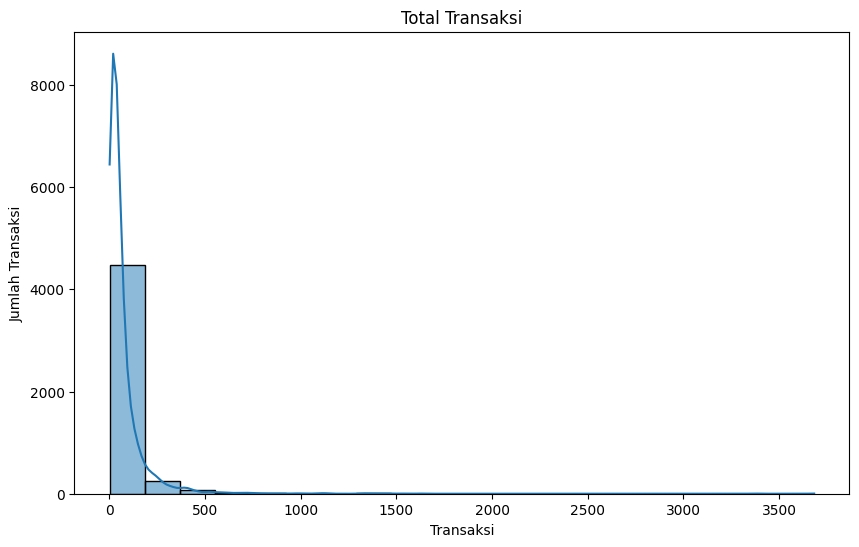

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Total Transaksi')
plt.xlabel('Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

Program dibawah ini merupakan program yang melakukan imputasi median atau pengisian data yang mengalami missing values

In [ ]:
df['Amount'] = df['Amount'].fillna(df['Amount'].dropna().median())

1. **Balance (1.18%)**

Memiliki missing values sekitar 1%, yang dimana ini nilai yang kecil sebagai indikasi hilang nya data pada kolom tersebut. Sehingga kolom tersebut dapat dilakukan imputasi data atau pengisian data.

Berdasarkan histogram Balance dibawah ini, imputasi dengan median adalah pilihan paling tepat. Distribusinya tidak normal dan tidak simetris, dengan beberapa puncak serta rentang sangat lebar dari sekitar minus tiga hingga mendekati nol.

Ini menunjukkan adanya nilai ekstrem atau outlier. Dalam kondisi seperti ini, mean kurang tepat karena mudah terpengaruh outlier sehingga bisa memberi hasil yang menyesatkan. Modus juga tidak cocok karena tidak ada satu nilai yang benar-benar dominan.

Median lebih aman karena memakai nilai tengah yang tidak dipengaruhi outlier atau bentuk distribusi yang tidak teratur, sehingga nilai pengganti tetap mewakili data dan tidak merusak analisis berikutnya.


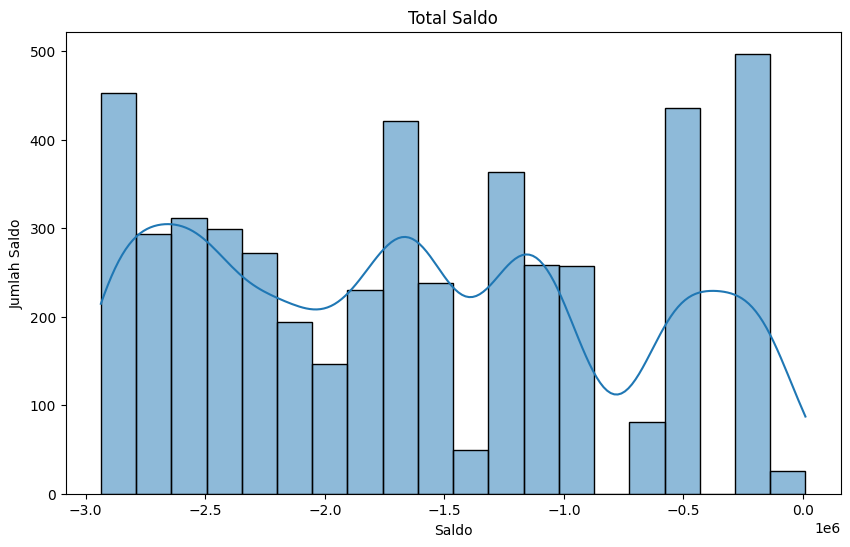

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Balance'], bins=20, kde=True)
plt.title('Total Saldo')
plt.xlabel('Saldo')
plt.ylabel('Jumlah Saldo')
plt.show()

Program dibawah ini merupakan program yang melakukan imputasi median atau pengisian data yang mengalami missing values

In [ ]:
df['Balance'] = df['Balance'].fillna(df['Balance'].dropna().median())

2. **MerchantPhone (23.32%)**

Memiliki missing values sekitar 23%, yang dimana ini nilai yang cukup besar sebagai indikasi hilang nya data pada kolom tersebut. Walaupun kolom numerik yang memiliki missing values besar, tetapi secara konteks ini adalah sebuah nomor telepon, dimana proses imputasi tidak dapat dilakukan dikarenakan nomor telepon merupakan nomor **spesifik unik** yang tidak bisa dibuat-buat, membuat kolom ini harus **diabaikan**.

3. **MerchantEmail (30.33%)**

Memiliki missing values sekitar 30%, yang dimana ini nilai yang cukup besar sebagai indikasi hilang nya data pada kolom tersebut. Kolom ini merupakan kolom email dimana isi data dalam kolom ini adalah kolom yang berisikan campuran huruf dan angka, dimana secara konteks kita tidak dapat melakukan imputasi, membuat kolom ini harus **diabaikan**

4. **PostalCode (5.24%)**

Memiliki missing values sekitar 5%, yang dimana ini nilai yang lumayan kecil sebagai indikasi hilang nya data pada kolom tersebut. Kolom ini merupakan kolom kode postal yang dimana sebuah **kode alamat postal rumah**, hal tersebut menunjukkan bahwa kolom ini memiliki isi data yang spesifik dan tidak dapat dibuat-buat, akan hal tersebut hal yang dapat dilakukan adalah **mengabaikan** kolom ini.


5. **CardNumber (7.24%)**

Memiliki missing values sekitar 7%, yang dimana ini nilai yang lumayan kecil sebagai indikasi hilang nya data pada kolom tersebut. Pada kolom ini kita ditunjukkan bahwa ini adalah sebuah nomor kartu transaksi yang dilakukan, hal tersebut menunjukkan bahwa kolom ini memiliki isi data yang spesifik dan tidak dapat dibuat-buat, akan hal tersebut yang dapat dilakukan adalah **mengabaikan** kolom ini.


6. **Email (4.27%)**

Memiliki missing values sekitar 4%, yang dimana ini nilai yang lumayan kecil sebagai indikasi hilang nya data pada kolom tersebut. Kolom ini merupakan kolom email dimana isi data dalam kolom ini adalah kolom yang berisikan campuran huruf dan angka, dimana secara konteks kita tidak dapat melakukan imputasi, membuat kolom ini harus **diabaikan**

7. **Phone (5.41%)**

Memiliki missing values sekitar 5%, yang dimana ini nilai yang lumayan kecil sebagai indikasi hilang nya data pada kolom tersebut. Walaupun kolom numerik yang memiliki missing values besar, tetapi secara konteks ini adalah sebuah nomor telepon, dimana proses imputasi tidak dapat dilakukan dikarenakan nomor telepon merupakan nomor **spesifik unik** yang tidak bisa dibuat-buat, membuat kolom ini harus **diabaikan**.


9. **Notes (13.26%)**

Memiliki missing values sekitar 23%, yang dimana ini nilai yang lumayan besar sebagai indikasi hilang nya data pada kolom tersebut. Kolom ini merupakan kolom keterangan dari transaksi, dimana isi data dalam kolom ini adalah kolom yang berisikan campuran huruf, dimana secara konteks kita tidak dapat melakukan imputasi, membuat kolom ini harus **diabaikan**

10. **CustomerSince (66.4%)**

Memiliki missing values sekitar 66,4%, yang dimana ini nilai yang besar sebagai indikasi hilang nya data pada kolom tersebut. Kolom ini merupakan kolom numerik dimana isi data dalam kolom ini adalah kolom yang berisikan tahun dari kapan kostumer itu berlangganan, dimana secara konteks kita tidak dapat melakukan imputasi dikarenakan tahun itu sendiri tidak bisa tentukan secara langsung, membuat kolom ini harus **diabaikan**

10. **Date, AccountID, AccountName, TransactionType, Currency, ExchangeRate, Merchant, Category, Subcategory, Country, City dan lainnya**

Kolom-kolom tersebut memiliki missing value di bawah **1% (0.0000% - 0.0825%)**, bisa diabaikan dikarenankan tidak terlalu mempengaruhi penganalisaan nantinya.

**Mengecek Missing Values Kembali**

Terlihat presentase setiap kolom masih ada, dimana terdapat beberapa alasan yang dimiliki. Untuk kolom yang memiliki missing values dibawah 1%, perlu diabaikan karena tidak akan terlalu mempengaruhi proses penganalisaan.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
TransactionID,0.049505
Date,0.000000
AccountID,0.016502
AccountName,0.016502
TransactionType,0.033003
Amount,0.000000
Currency,0.082508
ExchangeRate,0.033003
Balance,0.000000
Merchant,0.033003


## **Duplicated Values**

Pada tahap ini kita akan melakukan penanganan terhadap kolom atau baris yang mengalami duplikasi, penanganan dilakukan dengan menghapus kolom atau baris tersebut.

In [ ]:
df = df.drop_duplicates()

## **Outliers Values**

Outlier adalah nilai yang sangat berbeda dari data lainnya dalam satu dataset. Nilai ini bisa jauh lebih tinggi atau jauh lebih rendah dibanding sebagian besar data. Outlier dapat terjadi karena kesalahan saat input data atau karena kejadian yang memang tidak biasa terjadi.

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Amount,11.437531
ExchangeRate,0.000000
Balance,0.000000
MerchantPhone,2.129064
PostalCode,0.000000
Phone,2.508665
CustomerSince,0.000000


1. **Kolom MerchantPhone & Phone**

Pada tahap sebelumnya saat kita melakukan verifikasi kualitas data outlier, terdapat hasil yang tidak bisa dikatakan outliers, dimana hasil yang dikeluarkan adalah hanya terdapat outlier pada dua kolom yaitu **kolom phone dan merchant phone**, alasan tidak dapat dilakukannya perbaikan data pada kedua kolom tersebut, dikarenakan kedua kolom tersebut merupakan nomor hp, dimana nomor hp merupakan kode unik yang bisa saja memiliki **nilai numerik yang tinggi**.

Atas hal tersebut, pada tahap ini akan dilewatkan dikarenakan tidak ada kolom lainnya yang mengalami outliers value selain kolom **phone dan merchant phone**

2. **Kolom Amount**

Terlihat pada tabel diatas, terdapat pembaruan nilai outliers baru yang keluar, yaitu pada kolom Amount. Kolom Amount mengalami outliers sebesar 8,6 %, yang dimana hal tersebut cukup besar dan perlu ditangani dengan cara

# **Construct Data**

Tahap Construct Data adalah proses kreatif dalam analisis data. Di sini, kita tidak lagi hanya membersihkan data, melainkan membuat kolom yang baru dari data yang sudah ada untuk memperkaya analisis.

1. **Membuat Kolom Baru "Amount_IDR"**

Dataset punya transaksi dari berbagai mata uang (USD, GBP, AED, INR) sehingga nilainya tidak bisa langsung dibandingkan. Kolom ExchangeRate di dataset berfungsi sebagai kurs konversi ke INR (Rupee India), bukan ke IDR. Buktinya, transaksi ber-currency INR selalu punya **ExchangeRate = 1.0** (artinya sudah dalam INR).
Jadi prosesnya dua langkah:

* Langkah 1 - Amount x ExchangeRate = menyamakan semua ke INR dulu. Contoh: USD 47.36 x 80.69 = INR 3.821

* Langkah 2 - Amount_INR x 190 = konversi INR ke IDR pakai kurs statis 1 INR ≈ Rp190. Contoh: INR 3.821 x 190 = Rp 726.048

Tujuannya supaya semua transaksi punya satuan yang sama dan bisa dibandingkan secara adil.

In [ ]:
# ExchangeRate di dataset = kurs ke INR, lalu 1 INR ≈ 190 IDR
INR_TO_IDR = 190
df['Amount_INR'] = df['Amount'] * df['ExchangeRate']
df['Amount_IDR'] = df['Amount_INR'] * INR_TO_IDR

df = df.drop('Amount_INR', axis=1)

/tmp/ipython-input-790/3969321972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_INR'] = df['Amount'] * df['ExchangeRate']
/tmp/ipython-input-790/3969321972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount_IDR'] = df['Amount_INR'] * INR_TO_IDR


2. **Membuat Kolom Baru "Balance_Category"**

Kolom Balance berisi angka desimal yang susah langsung dibaca polanya. Fungsi ini mengubah angka mentah menjadi label kategorik yang lebih mudah dianalisis dan divisualisasikan.
Aturan klasifikasinya:

* Kalau Balance kosong/null - Unknown
* Kalau nilainya di atas 0 - Positive (saldo menguntungkan)
* Kalau nilainya tepat 0 - Zero
* Kalau nilainya di bawah 0 - Negative (saldo minus/defisit)

In [ ]:
def balance_category(bal):
    if pd.isna(bal):
        return 'Unknown'
    elif bal > 0:
        return 'Positive'
    elif bal == 0:
        return 'Zero'
    else:
        return 'Negative'

df['BalanceCategory'] = df['Balance'].apply(balance_category)

**Mengecek Kolom Baru Apakah Sudah Tersedia?**

Dapat dilihat kolom-kolom baru yang kita buat sudah terlihat.

In [ ]:
print(df.columns)

Index(['TransactionID', 'Date', 'AccountID', 'AccountName', 'TransactionType',
       'Amount', 'Currency', 'ExchangeRate', 'Balance', 'Merchant',
       'MerchantPhone', 'MerchantEmail', 'Category', 'Subcategory', 'Country',
       'City', 'PostalCode', 'CardNumber', 'Email', 'Phone', 'IsFraud',
       'Notes', 'CustomerSince', 'Amount_IDR', 'BalanceCategory'],
      dtype='object')


# **Data Reduction**

Tahap Data Reduction bertujuan untuk menyederhanakan dataset tanpa menghilangkan informasi penting. Pada tahap ini, data yang tidak relevan, terlalu detail, atau mengganggu dibuang agar proses analisis lebih cepat dan hasil visualisasi lebih jelas serta mudah dipahami.

Terdapat total sembilan kolom yang saya akan hapus, yaitu sebagai berikut:

*   **Menghapus Kolom TransactionID**


Tidak merepresentasikan informasi apapun tentang perilaku transaksi, jadi tidak berguna untuk analisis pola, maupun prediksi.

In [ ]:
df = df.drop('TransactionID', axis=1)

*   **Menghapus Kolom AccountID**


Dalam konteks analisis ini kita tidak melakukan join antar tabel, sehingga kolom ini tidak memberikan makna apapun.

In [ ]:
df = df.drop('AccountID', axis=1)

*   **Menghapus Kolom AccountName**


Nama pelanggan tidak relevan untuk analisis pola transaksi dan analisis tidak membutuhkan identitas siapa orangnya

In [ ]:
df = df.drop('AccountName', axis=1)

*   **Menghapus Kolom MerchantPhone**


Nomor telepon tidak memiliki hubungan logis dengan pola transaksi, kategori belanja. Tidak ada insight yang bisa dihasilkan dari kolom ini dalam konteks analisis e-commerce dan keuangan.

In [ ]:
df = df.drop('MerchantPhone', axis=1)

*   **Menghapus Kolom MerchantEmail**


Kolom email hanya mengidentifikasi siapa orangnya bukan bagaimana perilakunya, email tidak dapat digunakan untuk analisis.

In [ ]:
df = df.drop('MerchantEmail', axis=1)

*   **Menghapus Kolom PostalCode**


Informasi lokasi sudah diwakili secara memadai oleh kolom Country dan City.

In [ ]:
df = df.drop('PostalCode', axis=1)

*   **Menghapus Kolom CardNumber**


Nomor kartu tidak membawa informasi tentang perilaku atau karakteristik transaksi. Satu orang bisa punya banyak kartu, dan satu kartu bisa dipakai oleh banyak transaksi, tidak ada pola analitik yang bisa didapt dari nomor ini.

In [ ]:
df = df.drop('CardNumber', axis=1)

*   **Menghapus Kolom Email**


Kolom email hanya mengidentifikasi siapa orangnya bukan bagaimana perilakunya, email tidak dapat digunakan untuk analisis.

In [ ]:
df = df.drop('Email', axis=1)

*   **Menghapus Kolom Phone**


Nomor telepon tidak memiliki hubungan logis dengan pola transaksi, kategori belanja. Tidak ada insight yang bisa dihasilkan dari kolom ini dalam konteks analisis e-commerce dan keuangan.

In [ ]:
df = df.drop('Phone', axis=1)

# **Menyimpan Dataset (Bersih)**

In [ ]:
df.to_csv('[Finance_Ecommerce_Dirty_Dataset.csv', index=False)